<a href="https://colab.research.google.com/github/GiorgiaVitanza/DataScience/blob/master/Homework8.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [431]:
#Data of the problem
actual_infected = 50/10000
false_positive = 5/100
true_positive = 90/100

recall = 90/100 #recall

precision = 8/100 #probabilità di avere ragione

f1score = 0.15
print('desired precision:', precision)
print('desired recall:', recall)
print('desired f1:', f1score)

print('desired TP:', true_positive)
print('desired FP:', false_positive)

desired precision: 0.08
desired recall: 0.9
desired f1: 0.15
desired TP: 0.9
desired FP: 0.05


In [432]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [433]:
# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve
)

In [434]:
# Create an imbalanced dataset
n_sample = 1000
X_imbalanced, y_imbalanced = make_classification(n_samples=n_sample, n_features=10, n_classes=2, weights=[0.95, 0.05], random_state=42)

In [435]:
#splitting
X_imb_train, X_imb_test, y_imb_train, y_imb_test = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.2, random_state=42
)

# Train a logistic regression model on the imbalanced dataset
lr_imbalanced = LogisticRegression(random_state=42)
lr_imbalanced.fit(X_imb_train, y_imb_train)

LogisticRegression(random_state=42)

In [436]:
# Generate predictions by setting the optimal treshold to have recall = 0.90

y_imb_prob = lr_imbalanced.predict_proba(X_imb_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_imb_test, y_imb_prob)
idx = np.argmin(np.abs(recalls - 0.90))
optimal_threshold = thresholds[idx]

# Apply the best threshold
y_imb_pred = (y_imb_prob > optimal_threshold).astype(int)

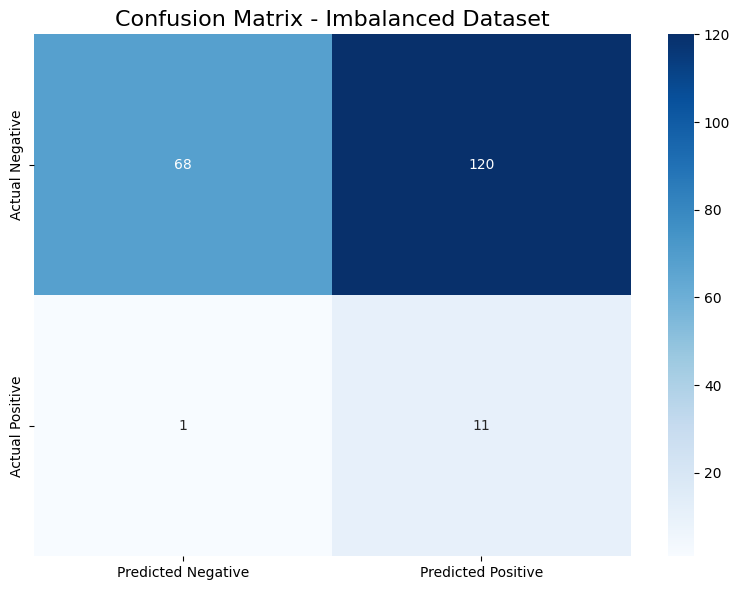

True Positives (TP): 11
False Positives (FP): 120
True Negatives (TN): 68
False Negatives (FN): 1


In [437]:
def plot_confusion_matrix(y_true, y_pred, title,n_sample):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Extract values for annotation
    tn, fp, fn, tp = cm.ravel()

    # Create a heatmap visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])

    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

    # Print TP, FP, TN, FN values
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")

# Plot confusion matrices for both datasets
plot_confusion_matrix(y_imb_test, y_imb_pred, "Confusion Matrix - Imbalanced Dataset",n_sample)

In [438]:
imbalanced_precision = precision_score(y_imb_test, y_imb_pred)

print(f"Imbalanced dataset precision: {imbalanced_precision:.2f}")

# Calculate recall
imbalanced_recall = recall_score(y_imb_test, y_imb_pred)

print(f"Imbalanced dataset recall: {imbalanced_recall:.2f}")

# Calculate F1 score
imbalanced_f1 = f1_score(y_imb_test, y_imb_pred)


print(f"Imbalanced dataset F1 score: {imbalanced_f1:.2f}")

Imbalanced dataset precision: 0.08
Imbalanced dataset recall: 0.92
Imbalanced dataset F1 score: 0.15
